<a href="https://colab.research.google.com/github/aslamiazoya/Proyek-Akhir-Dicoding-Analisis-dengan-Python/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Aslamia Zoya Erza Vyra]
- **Email:** [aslamiazoya12@gmail.com]
- **ID Dicoding:** [aslamiazoya]

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan sepeda dipengaruhi oleh perubahan cuaca dan musim?
2. Bagaimana perbandingan antara perentalan sepeda pada hari kerja dan pada bukan hari kerja?

## Import Semua Packages/Library yang Digunakan

Tahap pertama adalah menggunakan library pandas untuk membuat dataframe dari .csv
Kemudian, numpy untuk mengolah data
Lalu, menggunakan matplotlib.pyplot untuk membuat plot dan seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini, dilakukan pengumpulan data-data yang dibutuhkan. Terdapat 2 data yaitu hour.csv dan day.csv

In [ ]:
hour_df = pd.read_csv("/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Ditampilkan 5 data head dari hour.csv

In [ ]:
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dan ditampilkan 5 data head dari day.csv

### Assessing Data

Pada tahap ini, akan dilakukan penilaian kualitas dari seluruh data yang akan digunakan.

**Menilai data hour_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Output dari data hour_df.info() menunjukkan bahwa tidak ada data yang memiliki missing value. Semua data lengkap. Namun, tipe data di dteday seharusnya tipe data datetime dan bukan object.

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Langkah selanjutnya adalah memeriksa duplikasi data.

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Ternyata, tidak ada data dari hour_df yang terduplikasi

Lalu, langkah selanjutnya adalah dengan memeriksa parameter statistik dari kolom hour_df untuk melihat lebih jelas karakteristik variabel

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Output hour_df.describe() menghasilkan data yang normal

**Menilai data day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada output day_df.info(), data juga menunjukkan normal dan tidak ada missing values. Namun, tipe data dteday seharusnya datetime dan bukan object

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Langkah selanjutnya adalah memeriksa duplikasi data

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada data day_df

Lalu, langkah selanjutnya adalah dengan memeriksa parameter statistik dari kolom day_df untuk melihat lebih jelas karakteristik variabel

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Output day_df.describe() menghasilkan data yang normal juga

### Cleaning Data

Tahap selanjutnya, setelah menemukan kesalahan yang akan di perbaiki (bahwa tipe data dteday pada kedua data bukan datetime, melainkan object)

In [ ]:
date_times = ["dteday"]

for time in date_times:
  hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah cleaning data, tipe data akan berubah menjadi datetimes.

In [ ]:
date_times = ["dteday"]

for time in date_times:
  day_df["dteday"] = pd.to_datetime(day_df["dteday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah cleaning data, tipe data akan berubah menjadi datetimes.

## Exploratory Data Analysis (EDA)

Pada tahap EDA, dilakukan guna menjawab pertanyaan yang akan di analisis

### Explore day_df

**Disini dilakukan analisis untuk melihat bagaimana musim mempengaruhi penggunaan rental sepeda**

In [ ]:
day_df.describe(include="all")

<ipython-input-23-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter diatas, dengan min = 1 dan max 4, diperoleh mean 2.49 pada variabel musim, dengan informasi:
Season: 1 - Spring
        2 - Summer
        3 - Fall
        4 - Winter

In [ ]:
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "weathersit": "count",
})

,cnt,weathersit
season,,
1,471348,181
2,918589,184
3,1061129,188
4,841613,178


In [ ]:
result = day_df.groupby('season')['weathersit'].apply(lambda x: x.value_counts().idxmax())
print(result)


season
1    1
2    1
3    1
4    1
Name: weathersit, dtype: int64


Berdasarkan pivot tabel, diketahui bahwa lebih banyak pelanggan merental di 3 atau musim gugur (Fall) dengan nunique total perentalan sepeda sebanyak 1.061.129
Kemudian hasil menunjukkan banyak pelanggan merental sepeda pada cuaca cerah (1)


**Kemudian, dilakukan analisis untuk melihat perental sepeda merental di hari kerja atau bukan.**

In [ ]:
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: instant, dtype: int64

In [ ]:
weekday_counts = day_df.groupby('workingday')['weekday'].value_counts()
print(weekday_counts)

workingday  weekday
0           0          105
            6          105
            1           15
            4            2
            5            2
            2            1
            3            1
1           2          103
            3          103
            4          102
            5          102
            1           90
Name: weekday, dtype: int64


Didapatkan hasil bahwa pelanggan lebih banyak merental di hari kerja pada daripada di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda dipengaruhi oleh perubahan cuaca dan musim?

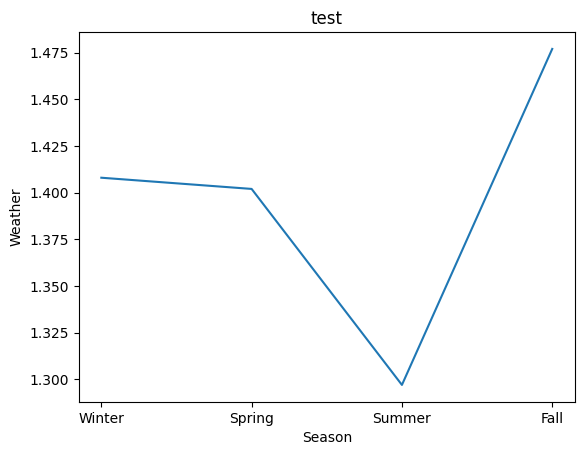

In [ ]:
data = {'weathersit': [1.408, 1.402, 1.297, 1.477], 'season': ["Winter", "Spring", "Summer", "Fall"]}

seasons = data['season']
weathersits = data['weathersit']

plt.plot(seasons, weathersits)
plt.xlabel("Season")
plt.ylabel("Weather")
plt.title("test")
plt.show()

### Pertanyaan 2: Bagaimana perbandingan antara perentalan sepeda pada hari kerja dan pada bukan hari kerja?

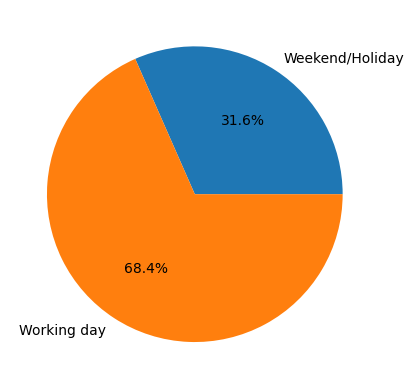

In [ ]:
data = {'workingday': ["Weekend/Holiday", "Working day"], 'nunique': [231, 500]}
pie_labels = data['workingday']
pie_values = data['nunique']

plt.pie(
    pie_values,
    labels=pie_labels,
    autopct="%1.1f%%"
)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Bagaimana tren penggunaan sepeda dipengaruhi oleh perubahan cuaca dan musim?

  Berdasarkan analisis yang telah dilakukan, didapati hasil bahwa perentalan terbanyak pada periode 2011 hingga 2012, dilakukan pada musim ke 3 atau musim gugur (Fall), dengan jumlah total sepeda sebanyak 1.061.129 buah. Diikuti dengan kedua terbanyak di musim panas sebanyak 918.589 buah sepeda, kemudian musim salju dengan  841.613 buah sepeda, dan yang terakhir pada musim semi dengan 471.348 buah sepeda. Kemudian rata-rata orang merental sepeda di cuaca cerah (clear).
Sehingga, dapat disimpulkan bahwa musim dan cuaca memiliki pengaruh signifikan.



- Conclution pertanyaan 2:
Bagaimana perbandingan antara perentalan sepeda pada hari kerja dan pada bukan hari kerja?
  Berdasarkan analisis perbandingan antara perentalan sepeda pada hari kerja dan bukan hari kerja, dari total keseluruhan 731 hari,didapatkan bahwa sebanyak 500 hari pelanggan merental sepeda di hari kerja daripada pelanggan merental sepeda di hari libur, sebanyak 231 hari sepeda keluar.
Hari kerja di mulai Senin-Kamis rata-rata banyak pelanggan merental sepeda, namun pada hari libur, rata-rata pelangggan merental sepeda di hari Minggu dan Jumat
Kesimpulannya, lebih banyak orang merental sepeda di hari kerja pada Senin-Kamis daripada di hari libur pada Minggu dan Jumat.

In [ ]:
hour_df.to_csv("hour_cleaned.csv", index=False)

In [ ]:
day_df.to_csv("day_cleaned.csv", index=False)